In [3]:
def average_scores(scores_):
    result = {}

    for name, scores in scores_.items():
        if len(scores) == 0:
            result[name] = None
        else:
            result[name] = sum(scores) / len(scores)

    return result

data = {
    "Ali": [18, 20, 17],
    "Sara": [],
    "Reza": [15, 16]
}

print(average_scores(data))




{'Ali': 18.333333333333332, 'Sara': None, 'Reza': 15.5}


In [4]:
import numpy as np


matrix = np.random.randint(0, 101, size=(6, 6))
row_means = matrix.mean(axis=1)
rows_above_50 = matrix[row_means > 50]
col_max = matrix.max(axis=0)

min_val = matrix.min()
max_val = matrix.max()
normalized_matrix = (matrix - min_val) / (max_val - min_val)

print("Original Matrix:\n", matrix)
print("\nRows with mean > 50:\n", rows_above_50)
print("\nMax of each column:\n", col_max)
print("\nNormalized Matrix:\n", normalized_matrix)


Original Matrix:
 [[ 6 67 80 75 87 84]
 [77 17 53 55 26 14]
 [11 63 87 11 57 76]
 [36 60 21 86 19 41]
 [76 29 71 70  8 52]
 [29 85 28 84  3 47]]

Rows with mean > 50:
 [[ 6 67 80 75 87 84]
 [11 63 87 11 57 76]
 [76 29 71 70  8 52]]

Max of each column:
 [77 85 87 86 87 84]

Normalized Matrix:
 [[0.03571429 0.76190476 0.91666667 0.85714286 1.         0.96428571]
 [0.88095238 0.16666667 0.5952381  0.61904762 0.27380952 0.13095238]
 [0.0952381  0.71428571 1.         0.0952381  0.64285714 0.86904762]
 [0.39285714 0.67857143 0.21428571 0.98809524 0.19047619 0.45238095]
 [0.86904762 0.30952381 0.80952381 0.79761905 0.05952381 0.58333333]
 [0.30952381 0.97619048 0.29761905 0.96428571 0.         0.52380952]]


In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "age": [22, 35, 28, 45, 31, 50, 26, 40],
    "income": [25000, 80000, 45000, 120000, 60000, 90000, 30000, 70000],
    "city": ["Tehran", "Shiraz", "Tabriz", "Tehran", "Isfahan", "Mashhad", "Qom", "Karaj"],
    "bought": [0, 1, 0, 1, 1, 1, 0, 1]
})

df.loc[2, "income"] = np.nan
median_income = df["income"].median()
df["income"] = df["income"].fillna(median_income)

def income_category(x):
    if x < 40000:
        return "low"
    elif x < 80000:
        return "medium"
    else:
        return "high"

df["income_level"] = df["income"].apply(income_category)

print(df)


   age    income     city  bought income_level
0   22   25000.0   Tehran       0          low
1   35   80000.0   Shiraz       1         high
2   28   70000.0   Tabriz       0       medium
3   45  120000.0   Tehran       1         high
4   31   60000.0  Isfahan       1       medium
5   50   90000.0  Mashhad       1         high
6   26   30000.0      Qom       0          low
7   40   70000.0    Karaj       1       medium


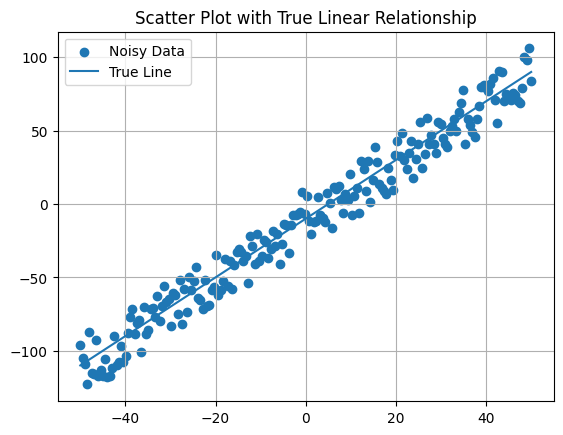

In [6]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-50, 50, 200)
noise = np.random.randint(-20, 21, size=len(x))
y = 2 * x - 10 + noise


plt.scatter(x, y, label="Noisy Data")
y_true = 2 * x - 10
plt.plot(x, y_true, label="True Line")


plt.title("Scatter Plot with True Linear Relationship")
plt.legend()
plt.grid(True)

plt.show()


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

np.random.seed(42)
n = 1000

age = np.random.randint(18, 66, size=n)
income = np.random.randint(30000, 150001, size=n)

y = ((age < 40) & (income > 90000)).astype(int)

X = np.column_stack([age, income])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)


model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


new_age = 32
new_income = 110000
new_x = np.array([[new_age, new_income]])

pred_class = model.predict(new_x)[0]
pred_prob = model.predict_proba(new_x)[0, 1]

print(f"New input -> age={new_age}, income={new_income}")
print("Predicted class:", pred_class)
print("Probability of class 1:", pred_prob)


Accuracy: 0.9233333333333333
New input -> age=32, income=110000
Predicted class: 1
Probability of class 1: 0.6298451330280227
